## Test Run of Regional and National Briefings
#### Author: Smitha Mahesh 
### Purpose: To test run the template to automate the production of 7 regional briefings and 8 regional briefings. I started using the actual datafile completed by Sophie to be able to test all variables of interest.

In [66]:
import pandas as pd
import numpy as np
import os

In [67]:
myworkingdirectory = r"Y:\NPS\WASO_Projects\Strategic Program Support\Safety\TSP Development Capacity Building 2021\Data Tasks\Region Briefings\Data\Output Data"
os.chdir(myworkingdirectory)

In [68]:
files = os.listdir(myworkingdirectory)
for f in files:
    print(f)

analysis_database_2022.csv
archive
CDS_slim_clean.csv
For Wayne
IMARS_slim_clean.csv
individual tables


In [69]:
os.chdir(myworkingdirectory)

In [70]:
analysis_2022 = pd.read_csv("analysis_database_2022.csv")

In [71]:
analysis_2022.columns

Index(['INCID_NO', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph', '30_mph',
       '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph', '65_mph',
       '70_mph', '75_mph', 'no_posted_speed', 'Crosswalk', 'Not a Crosswalk',
       'NUM_OCC', 'No Injury', 'Possible Injury', 'Non-incapacitating Injury',
       'Incapacitating Injury', 'Fatality', 'Unknown Injury', 'Num_Injuries',
       'Num_Fatalities', 'Injury or Fatal', 'Collision w Animal',
       'Avoiding Animal', 'Falling Object', 'Pedestrian', 'Bicycle',
       'Pedacycle', 'HorseLlama', 'Cow', 'Deer', 'Elk', 'Moose', 'Buffalo',
       'Bear', 'Antelope', 'SheepGoats', 'OtherWild', 'OtherDomestic',
       'Rock in Roadway', 'Animal in Roadway', 'Rockfall', 'LATITUDE',
       'LONGITUDE', 'Park', 'RGN', 'CRASH_DATE', 'CRASH_TIME', 'CRASH_YEAR'],
      dtype='object')

### Collisions with Animals Severity

#### Computing % of Total Crashes by Collision with Animals 

In [72]:
analysis_2022['Collision w Animal'].value_counts().sort_index()

0    821269
1     25882
Name: Collision w Animal, dtype: int64

In [73]:
collisionwanimal_total_crashes = 25882

In [74]:
analysis_2022.shape

(847151, 56)

In [75]:
collision_with_animal_percentage = round(collisionwanimal_total_crashes/847151,3)*100
collision_with_animal_percentage

3.1

#### Computing % Injury or Fatality by Collision with Animal 

In [76]:
#First find the number of collisions with animals that cause injury or fatality 
analysis_2022.value_counts(["Collision w Animal", "Injury or Fatal"])
#Collision w Animal = 1 and Injury or Fatal = 1 is 1739
collisionwanimal_counts=1739 
print (collisionwanimal_counts)

1739


In [77]:
#Computing percentage of injury or fatal
Collisionwanimal_injury_or_fatal= round(collisionwanimal_counts/collisionwanimal_total_crashes,3)*100
Collisionwanimal_injury_or_fatal

6.7

#### Computing No. Fatalities Among Collisions with Animals 


In [78]:
analysis_2022.value_counts(["Collision w Animal", "Fatality"])
#Good question to ask team: I am looking at Collision w Animal = 1 and Fatality = 1, which the count would be 19. But I am unsure why Fatality 2.0 is showing up, even though there are no 2 values in that column in the spreadsheet

Collision w Animal  Fatality
0                   0.0         818361
1                   0.0          25863
0                   1.0           2744
                    2.0            164
1                   1.0             19
dtype: int64

In [81]:
#Computing Number of Fatalities Among Collisions with Animals 
#Idea 2:
analysis_2022.apply(lambda x: True if x['Collision w Animal'] == '1' and x['Fatality'] == '1' else False, axis = 1)
num_rows = len(analysis_2022[analysis_2022 == True].index)
num_rows
#I wanted to see if this method can make the extraction of the count much cleaner. 
#Discussion Q: I see there is a column for 'Fatality' and another column for 'number of fatalities' Should we consider both or one of them? And what does 'Injury or Fatality' mean?
#I am not coding for Deer/Buffalo/etc. because I notice in the table that is more a detail of collision with animal charge code, not an additional separate charge code. 

847151

### Avoiding Animals (aka Animal-Related Crashes) Severity 

#### Computing % of Crashes caused by Avoiding Animals 

In [82]:
analysis_2022['Avoiding Animal'].value_counts().sort_index()

0    847086
1        65
Name: Avoiding Animal, dtype: int64

In [83]:
avoidinganimal_total_crashes = 65
print(avoidinganimal_total_crashes)

65


In [84]:
analysis_2022.shape

(847151, 56)

In [85]:
avoiding_animal_percentage = round(avoidinganimal_total_crashes/847151,5)*100
avoiding_animal_percentage

0.008

#### Computing % of Injury/Fatality for Avoiding Animals 

In [86]:
#First find the number of injury/fatalities caused by avoiding animal 
analysis_2022.value_counts(["Avoiding Animal", "Injury or Fatal"])

Avoiding Animal  Injury or Fatal
0                0                  670015
                 1                  177071
1                0                      59
                 1                       6
dtype: int64

In [87]:
#Avoiding Animal = 1 and Injury or Fatal = 1 
avoidinganimal_counts= 6
print (avoidinganimal_counts)

6


In [88]:
#Percentage of Injury/Fatality for Avoiding Animals
avoiding_animal_injuryfatality_percentage = round(avoidinganimal_counts/avoidinganimal_total_crashes, 3)*100
avoiding_animal_injuryfatality_percentage

9.2

#### No. Fatalities for Avoiding Animals - avoiding this code for now so as not to repeat error code... 

### Crashes Involving Pedestrians 

#### Computing % of Crashes Involving Pedestrians 

In [89]:
analysis_2022['Pedestrian'].value_counts().sort_index()

0    840650
1      6501
Name: Pedestrian, dtype: int64

In [90]:
pedestrian_total_crashes = 6501
print(pedestrian_total_crashes)

6501


In [91]:
analysis_2022.shape

(847151, 56)

In [92]:
pedestrian_percentage = round(pedestrian_total_crashes/847151,3)*100
pedestrian_percentage

0.8

#### Computing % of Injury/Fatality Involving Pedestrians

In [93]:
#First find the number of injury/fatalities involving pedestrians 
analysis_2022.value_counts(["Pedestrian", "Injury or Fatal"])

Pedestrian  Injury or Fatal
0           0                  666623
            1                  174027
1           0                    3451
            1                    3050
dtype: int64

In [94]:
#Pedestrian = 1 and Injury or Fatal = 1 means crash involving pedestrian resulted in injury or fatality 
pedestrian_counts= 3050
print (pedestrian_counts)

3050


In [95]:
#Percentage of Injury/Fatality for Pedestrians
pedestrian_injuryfatality_percentage = round(pedestrian_counts/pedestrian_total_crashes, 3)*100
pedestrian_injuryfatality_percentage

46.9

#### No. Fatalities Involving Pedestrians - avoiding this code for now so as not to repeat error code... 

## Crashes Involving Cyclists 

#### Computing % of Crashes Involving Cyclists 

In [96]:
analysis_2022['Bicycle'].value_counts().sort_index()

0    840685
1      6466
Name: Bicycle, dtype: int64

In [97]:
cyclists_total_crashes = 6466
print(cyclists_total_crashes)

6466


In [98]:
analysis_2022.shape

(847151, 56)

In [99]:
cyclists_percentage = round(cyclists_total_crashes/847151,3)*100
cyclists_percentage

0.8

#### Computing % of Injury/Fatality Involving Cyclists 

In [100]:
#First find the number of injury/fatalities involving cyclists 
analysis_2022.value_counts(["Bicycle", "Injury or Fatal"])

Bicycle  Injury or Fatal
0        0                  667219
         1                  173466
1        1                    3611
         0                    2855
dtype: int64

In [101]:
#Bicycle = 1 and Injury or Fatal = 1 means crash involving bicycle resulted in injury or fatality
cyclists_counts= 3611
print (cyclists_counts)

3611


In [102]:
#Percentage of Injury/Fatality Involving Cyclists
cyclists_injuryfatality_percentage = round(cyclists_counts/cyclists_total_crashes, 3)*100
cyclists_injuryfatality_percentage

55.800000000000004

#### No. Fatalities Involving Cyclists - avoiding this code for now so as not to repeat error code... 

#### Table of Crash Class and Severity - NOT READY NOT, WORK IN PROGRESS 

In [103]:
print("For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is")

For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is


In [104]:
#Template of code for table but got to figure out values for percentage of total crashes
#Values for 100 are fake, will be replaced soon, just put in for sake of balancing table
data= {'Collision Type': ['Collision w Animal','Avoiding Animal','Pedestrian', 'Bicycle'], 'Percentage of Total Crashes': [collision_with_animal_percentage,avoiding_animal_percentage,pedestrian_percentage,cyclists_percentage], 'Percentage in Fatality or Injury':[Collisionwanimal_injury_or_fatal, avoiding_animal_injuryfatality_percentage,pedestrian_injuryfatality_percentage,cyclists_injuryfatality_percentage]}

In [105]:
df = pd.DataFrame(data)

In [106]:
print(df)

       Collision Type  Percentage of Total Crashes  \
0  Collision w Animal                        3.100   
1     Avoiding Animal                        0.008   
2          Pedestrian                        0.800   
3             Bicycle                        0.800   

   Percentage in Fatality or Injury  
0                               6.7  
1                               9.2  
2                              46.9  
3                              55.8  


### Next section will construction bar graph of fatalities and injuries sorted by posted speed 


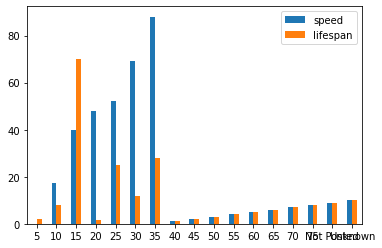

In [32]:
#TEMPLATED EXAMPLE 
speed = [0.1, 17.5, 40, 48, 52, 69, 88, 1,2,3,4,5,6,7,8,9,10]
lifespan = [2, 8, 70, 1.5, 25, 12, 28, 1,2,3,4,5,6,7,8,9,10]
index = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,'Not Posted','Unknown']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
#TEMPLATE NEED TO ADJUST - first one tests on fatalities and injuries 